In [5]:
import torch
import numpy as np

from torch.autograd import Variable

<module 'matplotlib.pyplot' from '/Users/shubham/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

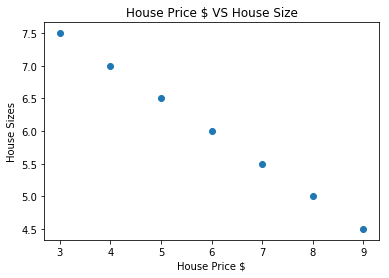

In [58]:
house_prices_array = [3, 4, 5, 6, 7, 8, 9]
house_price_np = np.array(house_prices_array, dtype=np.float32)
house_price_np = house_price_np.reshape(-1,1)
house_price_tensor = Variable(torch.from_numpy(house_price_np))

house_size = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
house_size_np = np.array(house_size, dtype=np.float32)
house_size_np = house_size_np.reshape(-1, 1)
house_size_tensor = Variable(torch.from_numpy(house_size_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(house_prices_array, house_size_np)
plt.xlabel("House Price $")
plt.ylabel("House Sizes")
plt.title("House Price $ VS House Size")
plt

In [59]:
import torch      
from torch.autograd import Variable     
import torch.nn as nn 

In [60]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function inherits from nn.Module so that we can access everything from nn.Module
        super(LinearRegression,self).__init__()
        # Linear function
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)

In [61]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim) # input and output size are 1

In [62]:
mse = nn.MSELoss()

In [63]:
# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch 0, loss 152.14947509765625
epoch 50, loss 5.989383697509766
epoch 100, loss 4.047277927398682
epoch 150, loss 2.734915256500244
epoch 200, loss 1.848097324371338
epoch 250, loss 1.2488363981246948
epoch 300, loss 0.8438911437988281
epoch 350, loss 0.5702519416809082
epoch 400, loss 0.38534271717071533
epoch 450, loss 0.2603924870491028
epoch 500, loss 0.17595794796943665
epoch 550, loss 0.11890190839767456
epoch 600, loss 0.0803467258810997
epoch 650, loss 0.05429394915699959
epoch 700, loss 0.03668822720646858
epoch 750, loss 0.024791842326521873
epoch 800, loss 0.016752826049923897
epoch 850, loss 0.011320752091705799
epoch 900, loss 0.0076501257717609406
epoch 950, loss 0.005169346462935209
epoch 1000, loss 0.0034930778201669455


<module 'matplotlib.pyplot' from '/Users/shubham/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

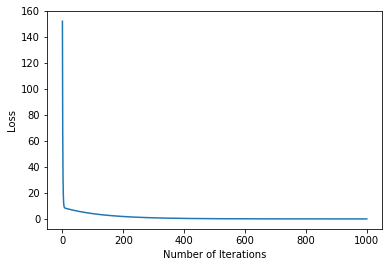

In [64]:
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(house_price_tensor)
    
    # Calculate Loss
    loss = mse(results, house_size_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt

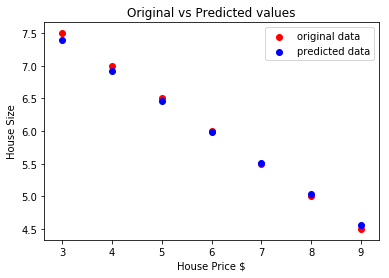

In [65]:
# predict our car price 
predicted = model(house_price_tensor).data.numpy()
plt.scatter(house_prices_array, house_size, label = "original data",color ="red")
plt.scatter(house_prices_array, predicted, label = "predicted data",color ="blue")

plt.legend()
plt.xlabel("House Price $")
plt.ylabel("House Size")
plt.title("Original vs Predicted values")
plt.show()